In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box

In [2]:
# data loading and descriptive statistics
df = pd.read_csv('SpotifyFeatures.csv')
df



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [3]:

# Remove duplicates + unnecessary variables
df.drop_duplicates(subset=['track_id'], keep='first',inplace=True)
df.drop(['genre','artist_name','track_name','track_id','key','time_signature'],axis=1, inplace=True)

# Data cleaning and arrangement the data
#time_signature_df=pd.get_dummies(df["time_signature"]) # create dummy variables for the categorical variable "time_signature" 
#df = pd.concat([df,time_signature_df],axis=1) # add the dummy variables
df['mode'] = np.where(df['mode']=='Major', 1, 0) #change songs' mode (minor/major) to numerical

# change songs duration from milliseconds to seconds
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True) # update column label


In [4]:
X= df.loc[:,df.columns !="popularity"]
y = df["popularity"]


In [5]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [6]:
# create a linear regression object
model_regression = linear_model.LinearRegression()

# create a random forest regression object
model_random_forest = RandomForestRegressor()

# create a random forest regression object
model_decision_tree = DecisionTreeRegressor()

In [7]:
# The models
model_regression.fit(X_train,y_train)
model_random_forest.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [8]:
# estimate the R² score on train data
print("Train data - the R^2 is",model_regression.score(X_train,y_train))
# estimate the R² score on test data
print("Test data - the R^2 is",model_regression.score(X_test,y_test))

Train data - the R^2 is 0.200495052173152
Test data - the R^2 is 0.20902561358958305


In [9]:
# estimate the R² score on train data
print("Train data - the R^2 is",model_random_forest.score(X_train,y_train))
# estimate the R² score on test data
print("Test data - the R^2 is",model_random_forest.score(X_test,y_test))

Train data - the R^2 is 0.9066797298252387
Test data - the R^2 is 0.3499177285402235


In [10]:
# estimate the R² score on train data
print("Train data - the R^2 is",model_decision_tree.score(X_train,y_train))
# estimate the R² score on test data
print("Test data - the R^2 is",model_decision_tree.score(X_test,y_test))

Train data - the R^2 is 0.9982843206460341
Test data - the R^2 is -0.3559081595586928


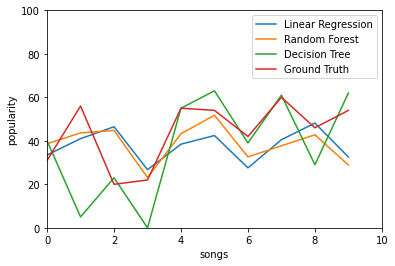

In [11]:
import matplotlib.pyplot as plt
test_samples = 10
regression = []
random_forest = []
decision_tree = []
ground_truth = []
for i in range(test_samples): 
    regression.append(model_regression.predict([X_test[i]])) 
    random_forest.append(model_random_forest.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])

plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()

In [12]:
# Variables normalization
acousticness = [0,1]
danceability = [0,1]
duration_s = [0,600]
energy = [0,1]
instrumentalness = [0,1]
liveness = [0,1]
loudness= [ -60,0]
speechiness = [0,1]
tempo = [0,250]
valence = [0,1]
mode = [0,1]
features_range = {"acousticness":[0,1],"danceability" : [0,1],"duration_s":[0,600],"energy":[0,1],"instrumentalness":[0,1],"liveness":[0,1],"loudness": [-60,0],"speechiness" : [0,1],"tempo" : [0,250],"valence" : [0,1],"mode" : [0,1]}


In [13]:
regression = [50]
random_forest = [50]
decision_tree = [50]
features = X.shape[1]
widgets_box = []
headers = X.columns
temp_sample =X.iloc[5]

#features_range["acousticness"][0]
for feature in range(features):
    
    temp_widget = widgets.FloatSlider(
    value=temp_sample[feature],
    min=features_range[headers[feature]][0],
    max=features_range[headers[feature]][1],
    step=0.1,
    description=headers[feature],
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
    )
    widgets_box.append(temp_widget)


box = Box(children=widgets_box)
box 

Box(children=(FloatSlider(value=0.749, continuous_update=False, description='acousticness', max=1.0, orientati…

In [14]:
for feature in range(features): 
    temp_sample[feature] = widgets_box[feature].value


<ipython-input-14-c5de197b69e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sample[feature] = widgets_box[feature].value


c:\Users\Ido Leshem\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


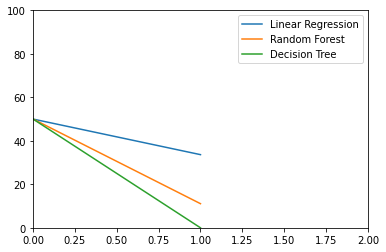

In [15]:

regression.append(model_regression.predict([temp_sample])) 
random_forest.append(model_random_forest.predict([temp_sample]))
decision_tree.append(model_decision_tree.predict([temp_sample]))

# Plot a simple line chart
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.xlim([0, len(regression)])
plt.ylim([0, 100])
plt.legend()
plt.show()